In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [0]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_nohead.csv to diabetes_nohead.csv


In [0]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes_nohead.csv", header=None, names=col_names)
print(pima)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]


In [0]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


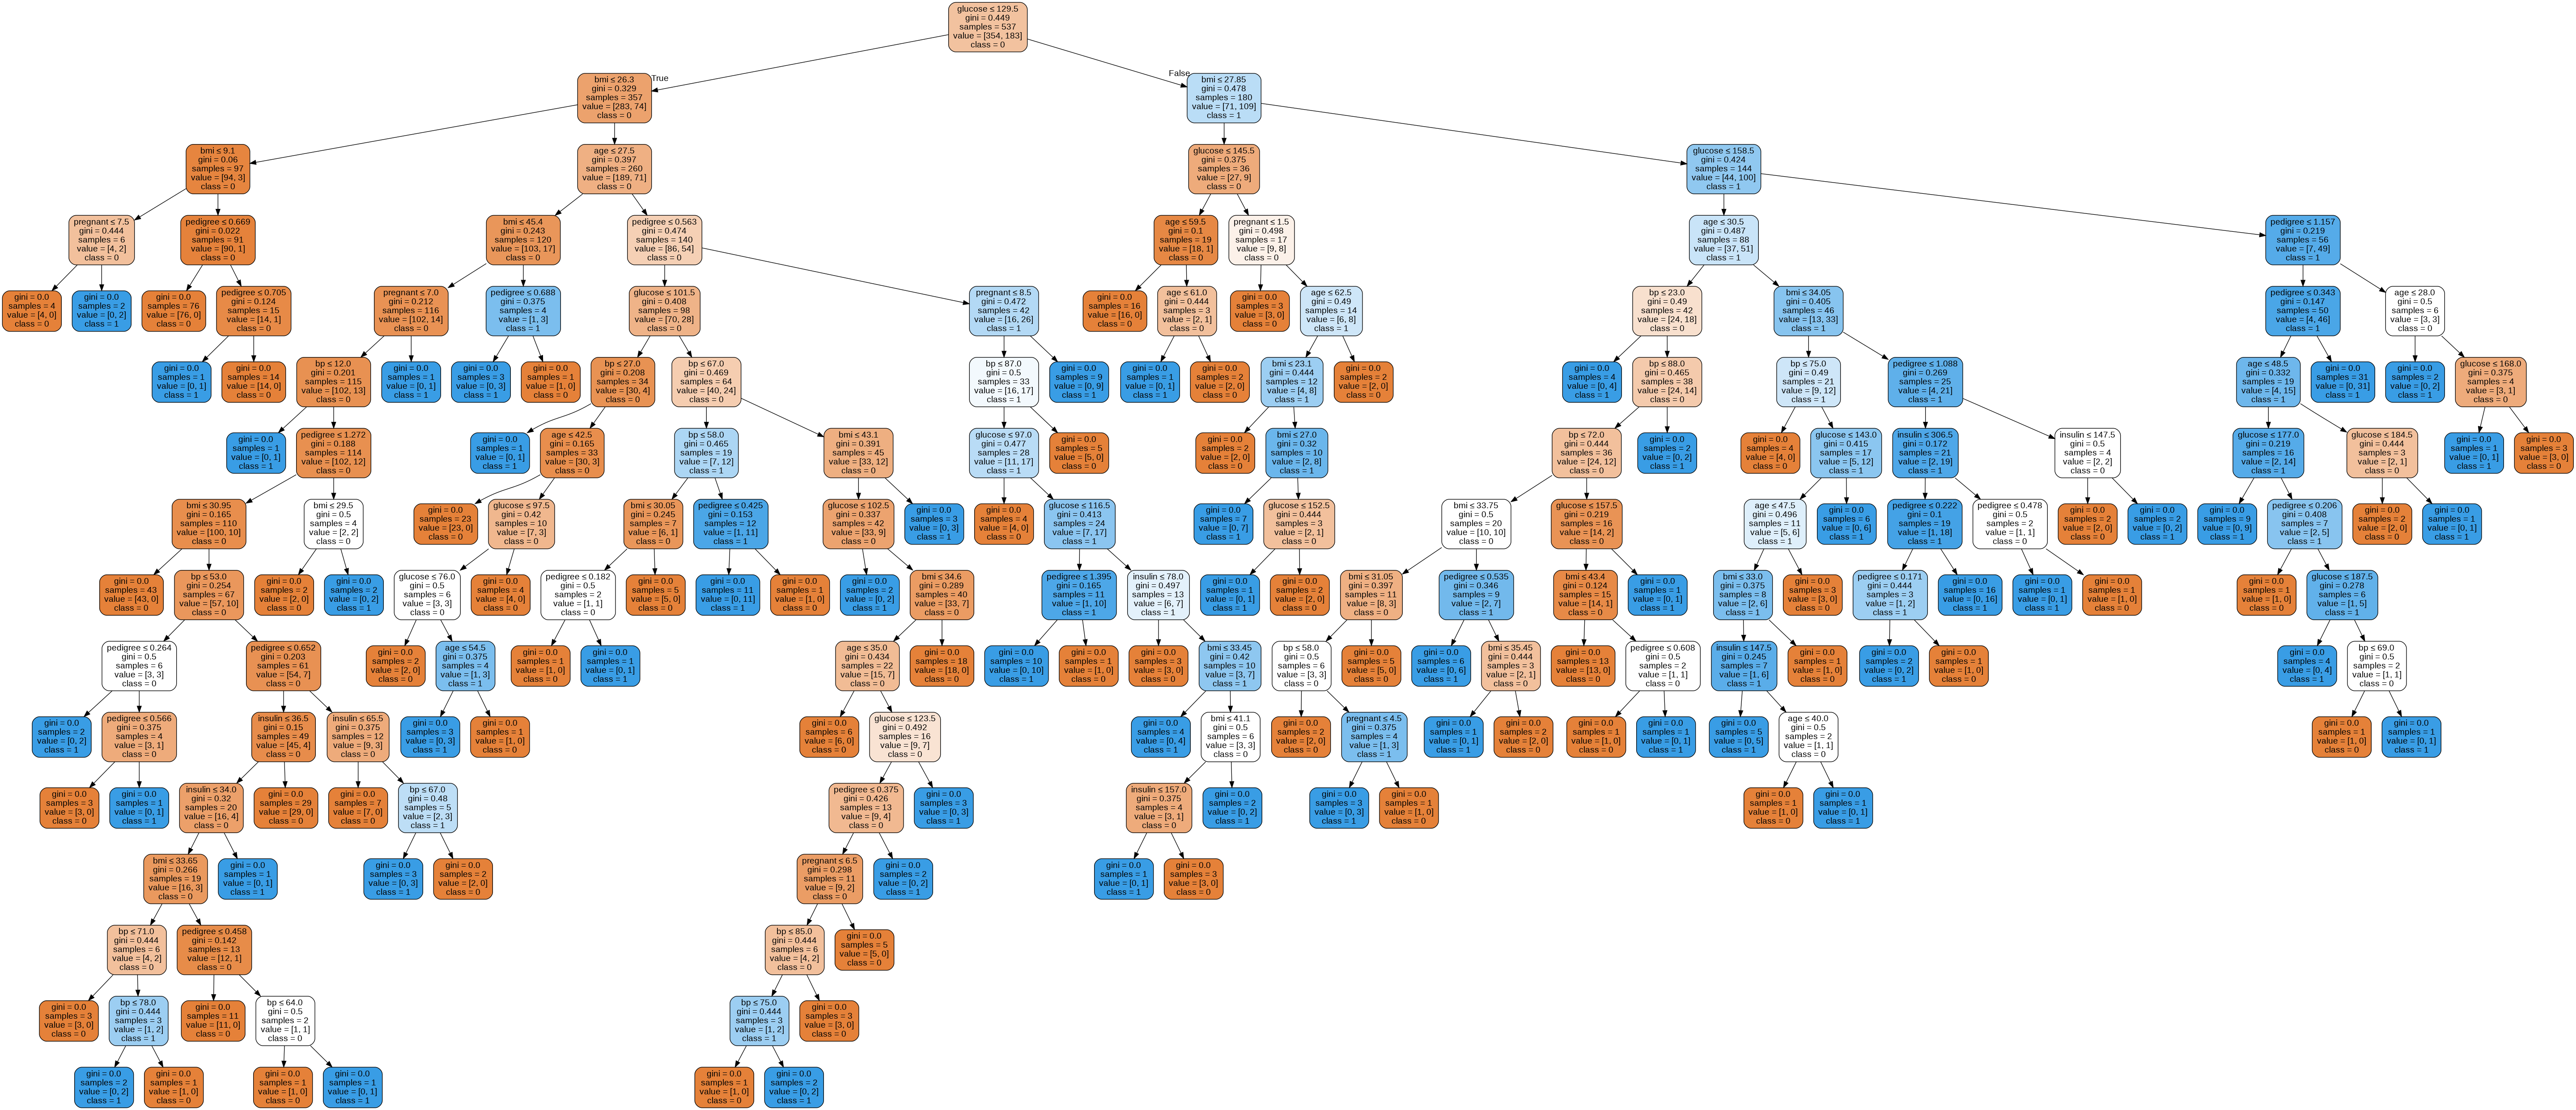

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [0]:
# Create Decision Tree classifer object
# clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Accuracy: 0.7705627705627706
# Precision: 0.7105263157894737
# Recall: 0.6352941176470588
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
# Accuracy: 0.6796536796536796
# Precision: 0.5733333333333334
# Recall: 0.5058823529411764
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Precision & Recall Score
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7575757575757576
Precision: 0.7164179104477612
Recall: 0.5647058823529412


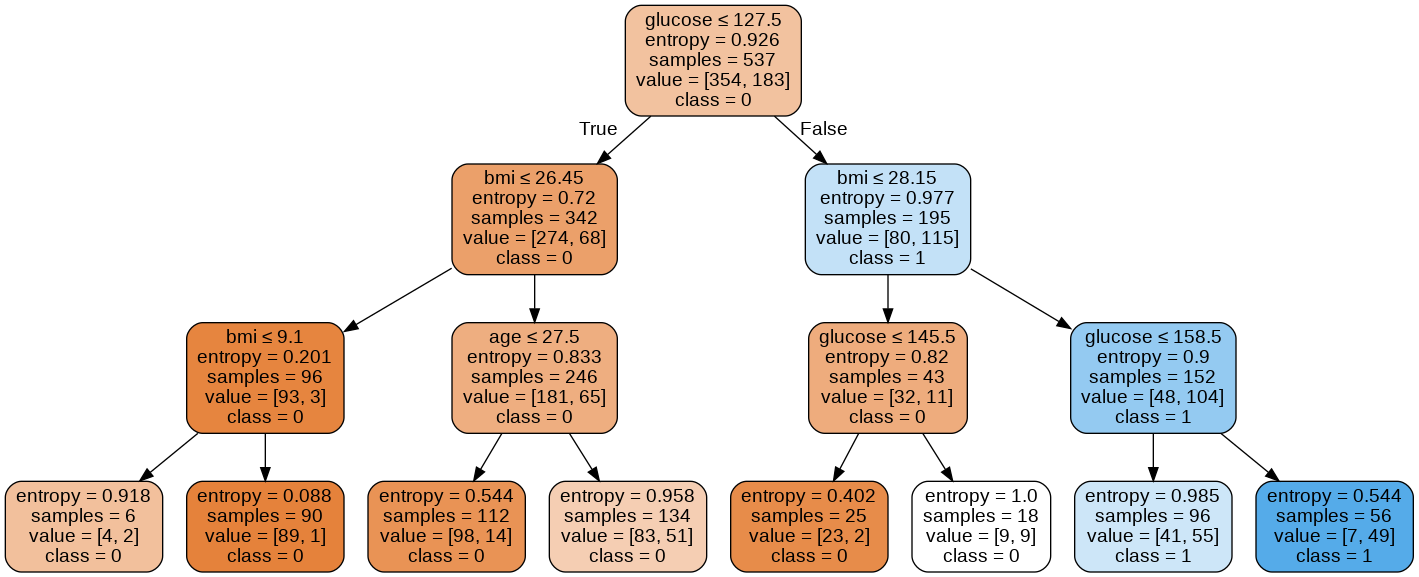

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())